# Explore here

In [4]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")


#EDA

df.head()
df.shape





#Eliminacion de los duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

#Eliminar variables que no afecten a la decision

df.drop(["contact", "month", "day_of_week", "pdays"], axis = 1, inplace = True)

df.head()


#Ver si existen valores nulos en el df
df.isnull().sum()


#Ver los tipos de datos (7 numéricos y 8 categóricos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(4), object

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


/tmp/ipykernel_701/3224144208.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], data=df, x="marital", palette="pastel")
/tmp/ipykernel_701/3224144208.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], data=df, x="education", palette="pastel")
/tmp/ipykernel_701/3224144208.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[2], data=df, x="loan", palette="pastel")


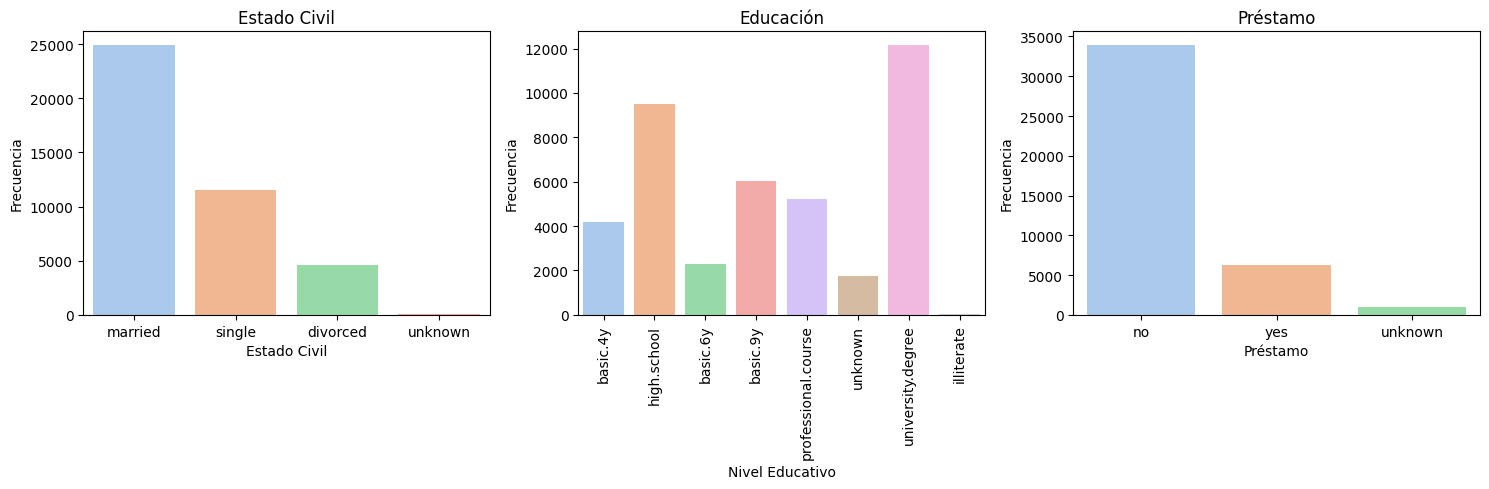

In [5]:
#Analisis Univariante/Categóricos


#Estado civil
print(df.marital.value_counts())

#Educacion
print(df.education.value_counts())

#Prestamo
print(df.loan.value_counts())


# Representación gráfica
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  # Aumentamos el tamaño de la figura para tres gráficos

# Gráfico para "Estado civil"
sns.countplot(ax=axis[0], data=df, x="marital", palette="pastel")
axis[0].set_title("Estado Civil")
axis[0].set_xlabel("Estado Civil")
axis[0].set_ylabel("Frecuencia")

# Gráfico para "Educación"
sns.countplot(ax=axis[1], data=df, x="education", palette="pastel")
axis[1].set_title("Educación")
axis[1].set_xlabel("Nivel Educativo")
axis[1].set_ylabel("Frecuencia")
axis[1].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x

# Gráfico para "Préstamo"
sns.countplot(ax=axis[2], data=df, x="loan", palette="pastel")
axis[2].set_title("Préstamo")
axis[2].set_xlabel("Préstamo")
axis[2].set_ylabel("Frecuencia")

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar el plot
plt.show()





Algo más del 50% de nuestra población esta casada
Aproximadamente el 25% tiene formacion universitaria
Un 70% no tiene préstamo activo con la entidad

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

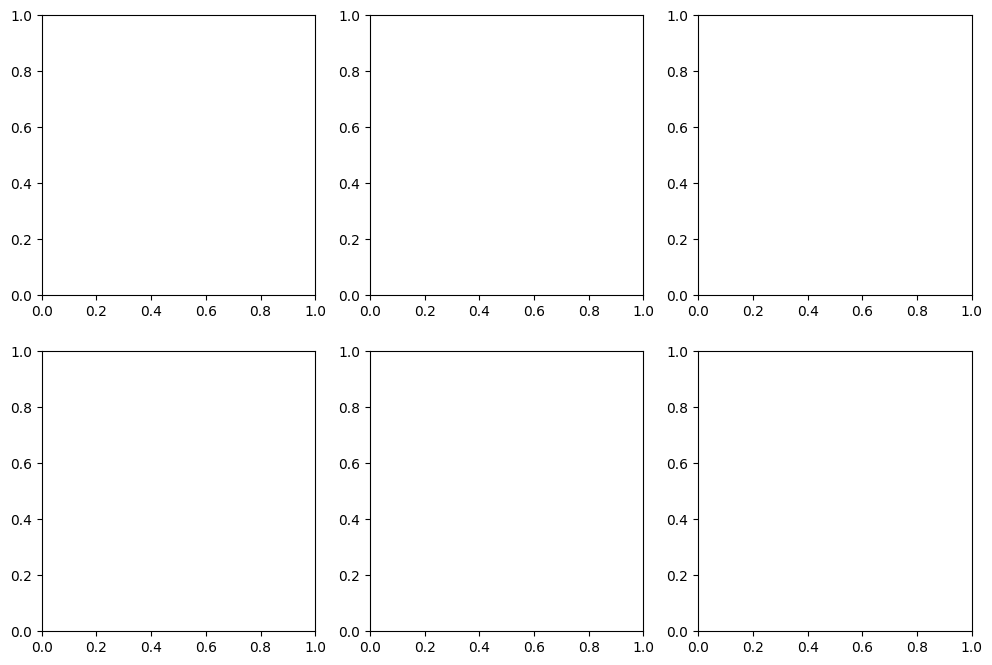

In [6]:
#Analisis Univariante/numéricos
#Edad
#Empleo
#Tasa de variación del empleo
#Índice de confianza



# Crear una figura y ejes para un layout 2x3
fig, axis = plt.subplots(2, 3, figsize=(12, 8))

# Histograma y diagrama de caja para "Euribor"
sns.kdeplot(ax=axis[0], data=df, x="euribor3m", fill=True, color="skyblue")
axis[0].set_title("Línea de densidad: Euribor")
axis[0].set_xlabel("Euribor")
axis[0].set_ylabel("Densidad")

sns.boxplot(ax=axis[1], data=df, x="euribor3m", color="lightgreen")
sns.boxplot(ax=axis[1], data=df, x="euribor3m", color="lightgreen")


# Histograma y diagrama de caja para "Age"
sns.histplot(ax=axis[0, 1], data=df, x="age").set(xlabel=None, ylabel=None, title="Histograma: Age")
sns.boxplot(ax=axis[1, 1], data=df, x="age")
axis[1, 1].set_title("Diagrama de caja: Age")

# Histograma y diagrama de caja para "Indice de confianza"
sns.histplot(ax=axis[0, 2], data=df, x="cons.conf.idx").set(xlabel=None, ylabel=None, title="Histograma: Indice de confianza")
sns.boxplot(ax=axis[2, 1], data=df, x="cons.conf.idx")
axis[1, 1].set_title("Diagrama de caja: Indice de confianza")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()





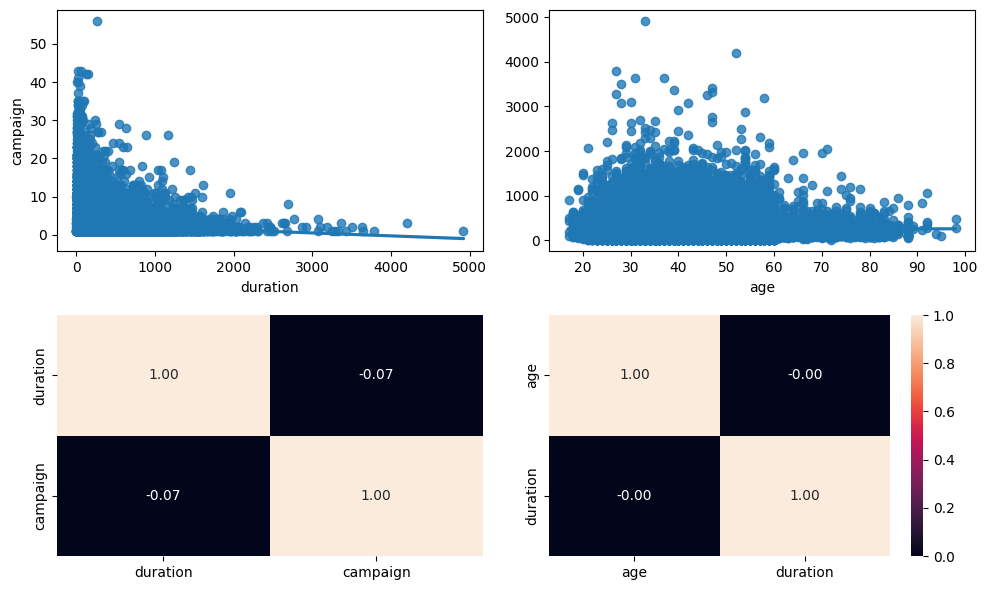

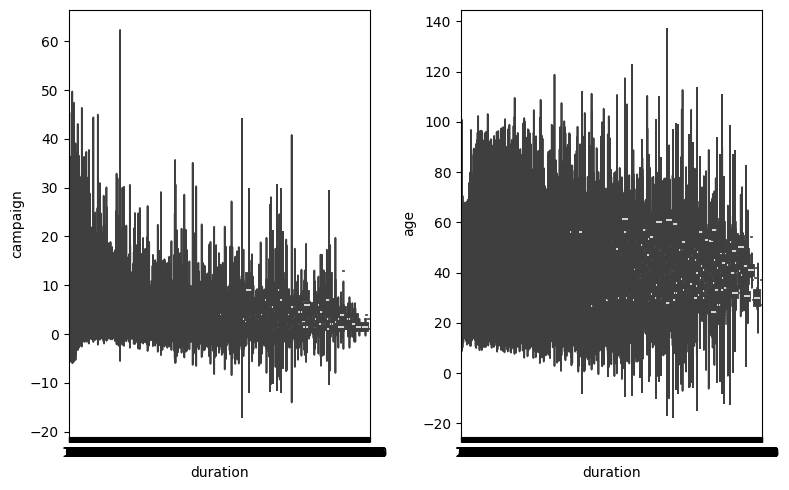

In [7]:
#Análisis multivariante

#Age, duration y campaign

A = "duration"
B = "campaign"
C = "age"



fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = A , y = B)
sns.heatmap(df[["duration", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = C, y = A).set(ylabel=None)
sns.heatmap(df[["age", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x=A, y=B, data=df)
sns.violinplot(ax = axis[1], x=A, y=C, data=df)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



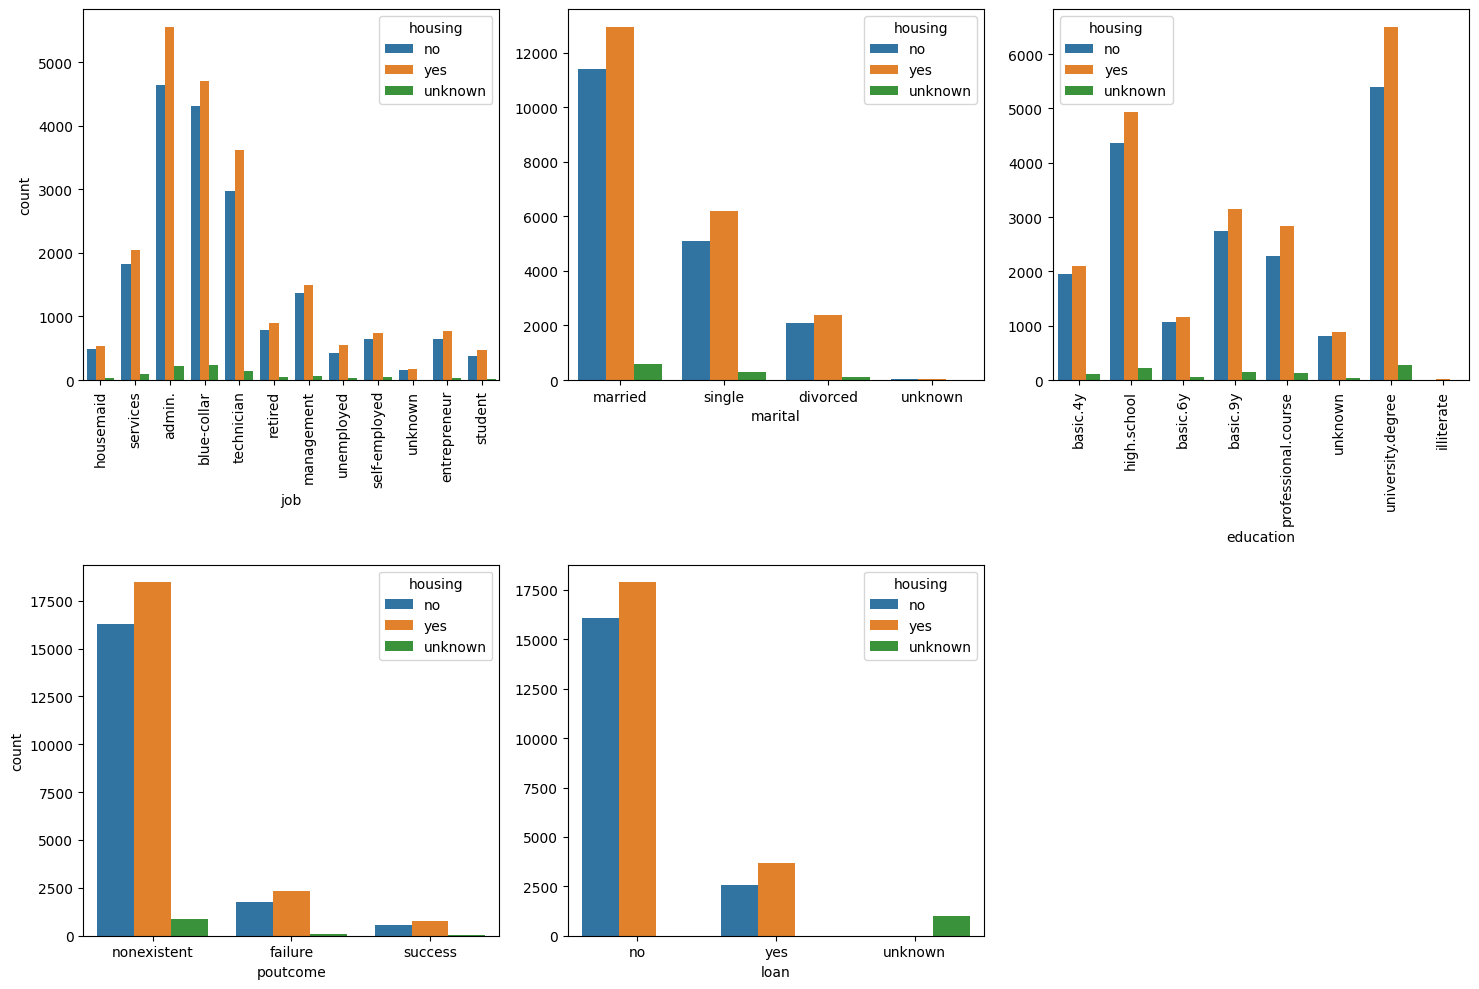

In [8]:
#Análisis categórico-categórico

D = "housing"


fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = D)
axis[0, 0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = D).set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = D).set(ylabel = None)
axis[0, 2].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x
sns.countplot(ax = axis[1, 0], data = df, x = "poutcome", hue = D)
sns.countplot(ax = axis[1, 1], data = df, x = "loan", hue = D).set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()



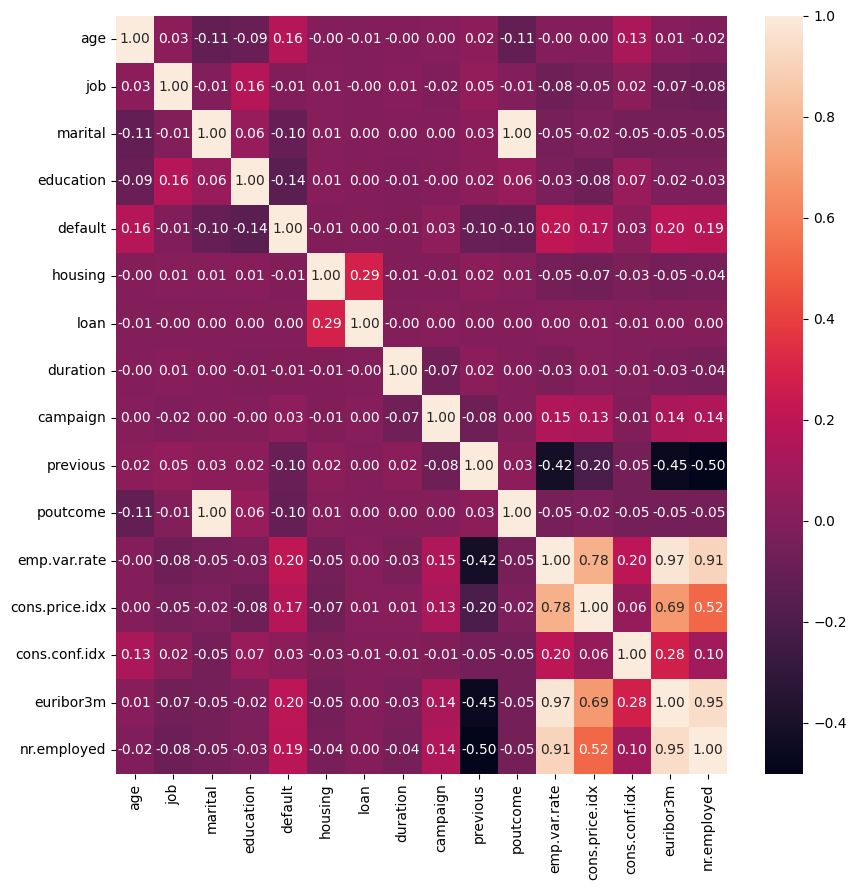

In [9]:
#Análisis de correlaciones

df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["poutcome"] = pd.factorize(df["marital"])[0]


fig, axis = plt.subplots(figsize = (9, 9))

sns.heatmap(df[["age", "job", "marital", "education", "default", "housing", "loan", 
                 "duration", "campaign", "previous", "poutcome", "emp.var.rate", 
                 "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()







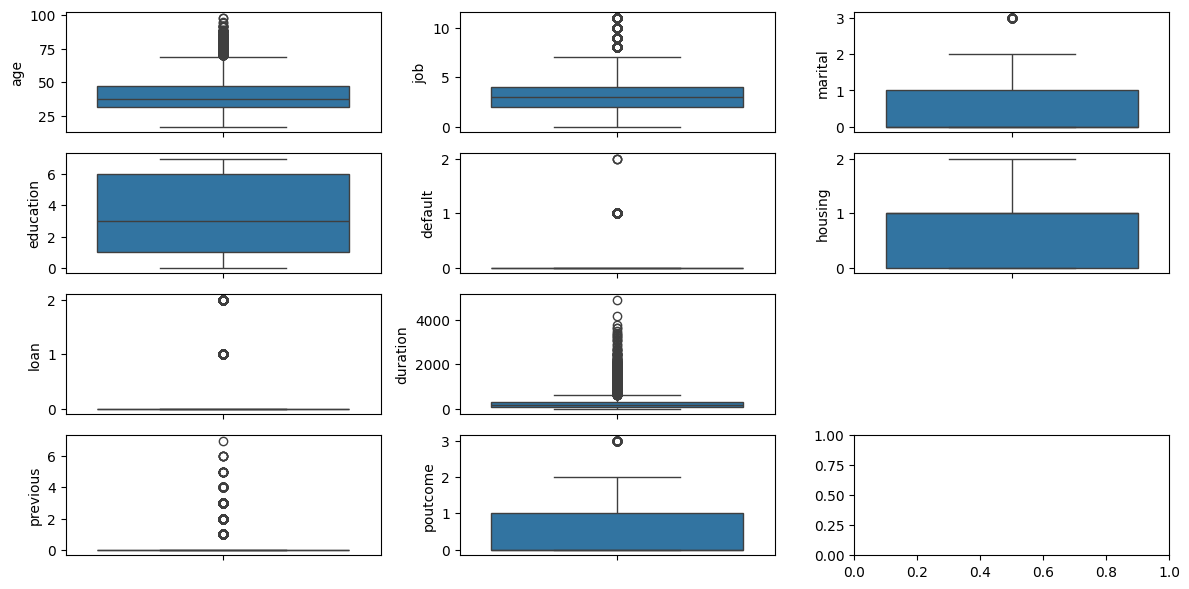

In [20]:
#Valores atípicos
df.describe()



fig, axis = plt.subplots(4, 3, figsize = (12, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "job")
sns.boxplot(ax = axis[0, 2], data = df, y = "marital")
sns.boxplot(ax = axis[1, 0], data = df, y = "education")
sns.boxplot(ax = axis[1, 1], data = df, y = "default")
sns.boxplot(ax = axis[1, 2], data = df, y = "housing")
sns.boxplot(ax = axis[2, 0], data = df, y = "loan")
sns.boxplot(ax = axis[2, 1], data = df, y = "duration")
sns.boxplot(ax = axis[2, 2], data = df, y = "campaign")
sns.boxplot(ax = axis[3, 0], data = df, y = "previous")
sns.boxplot(ax = axis[3, 1], data = df, y = "poutcome")


fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

Tenemos outliers en las siguientes variables:
    -Age
    -Job
    -duration
    -default
    -previous
    -poutcome
    -loan

In [ ]:
#AGE

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [22]:
# Definir los límites inferior y superior
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 92.0 y -13.0, con un rango intercuartílico de 15.0


In [24]:
age_altos = df[df["age"] >= 92]
age_altos

age_altos.loan.value_counts()

loan
0    6
1    2
Name: count, dtype: int64

In [26]:
df = df[df["age"] <= 95]  # Mantener solo los valores de "age" menores o iguales a 95


In [27]:
#DEFAULT

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['default'].quantile(0.25)
Q3 = df['default'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0


In [ ]:
#Revisar si hay valores faltantes
df.isnull().sum().sort_values(ascending=False) 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64